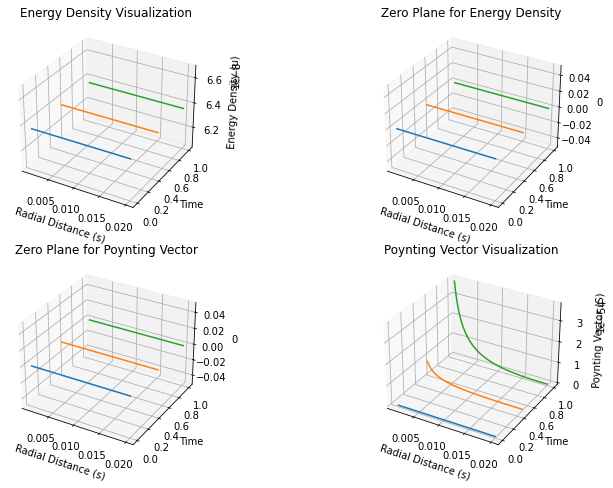

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
epsilon_0 = 8.854e-12  # Permittivity of free space
mu_0 = 4 * np.pi * 1e-7  # Permeability of free space
I_0 = 1.0  # Amplitude of current
omega = 2 * np.pi  # Angular frequency
a = 0.02  # Inner radius of the coaxial cable

# Function to calculate energy density
def energy_density(s, t):
    # Electric field contribution
    E_field = (mu_0 / (2 * np.pi)) * I_0 * omega * np.sin(omega * t) * np.log(a / s)
    
    # Magnetic field contribution
    B_field = - (mu_0 / np.pi) * I_0 * np.cos(omega * t)
    
    # Energy density
    u = 0.5 * (epsilon_0 * E_field**2 + 1 / mu_0 * B_field**2)
    
    return u

# Visualization
s_values = np.linspace(0.001, 0.02, 100)  # Radial distances

# Time instants for visualization
time_instances = [0, np.pi / omega, 2 * np.pi / omega]

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(221, projection='3d')
ax2 = fig.add_subplot(222, projection='3d')
ax3 = fig.add_subplot(223, projection='3d')
ax4 = fig.add_subplot(224, projection='3d')

for t in time_instances:
    u_values = [energy_density(s, t) for s in s_values]
    S_values = [0.5 * epsilon_0 * E_field**2 for E_field in (mu_0 / (2 * np.pi)) * I_0 * omega * np.sin(omega * t) * np.log(a / s_values)]

    ax1.plot(s_values, [t] * len(s_values), u_values, label=f'Time = {t:.2f}')
    ax2.plot(s_values, [t] * len(s_values), [0] * len(s_values), label=f'Time = {t:.2f}')
    ax3.plot(s_values, [t] * len(s_values), [0] * len(s_values), label=f'Time = {t:.2f}')
    ax4.plot(s_values, [t] * len(s_values), S_values, label=f'Time = {t:.2f}')

# Set labels and titles
ax1.set_xlabel('Radial Distance (s)')
ax1.set_ylabel('Time')
ax1.set_zlabel('Energy Density (u)')
ax1.set_title('Energy Density Visualization')

ax2.set_xlabel('Radial Distance (s)')
ax2.set_ylabel('Time')
ax2.set_zlabel('0')
ax2.set_title('Zero Plane for Energy Density')

ax3.set_xlabel('Radial Distance (s)')
ax3.set_ylabel('Time')
ax3.set_zlabel('0')
ax3.set_title('Zero Plane for Poynting Vector')

ax4.set_xlabel('Radial Distance (s)')
ax4.set_ylabel('Time')
ax4.set_zlabel('Poynting Vector (S)')
ax4.set_title('Poynting Vector Visualization')

plt.show()